In [78]:
# File processing 
import os

# Data processing 
import numpy as np
from numpy import linalg as LAnumpy

# Data display 
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.legend_handler import HandlerLine2D
from scipy.spatial import distance_matrix
from sklearn.metrics import mean_squared_error


# Constants

In [2]:
EMBEDDING_SIZE = 3
TRUSSART_STRUCTURES_PATH = '../../../data/trussart/structure_matrices/'

# Seeds

# Structure analysis functions

In [3]:
def centralize_numpy(z):
    return z - np.mean(z, axis=0)

In [4]:
def normalize_numpy(z):
    
    norm = LAnumpy.norm(z, 2, axis=1)
    max_norm = np.max(norm, axis=0)
    if max_norm == 0:
        max_norm = 1
    
    return z / max_norm

In [5]:
def centralize_and_normalize_numpy(z):
    
    # Translate
    z = centralize_numpy(z)
    
    # Scale
    z = normalize_numpy(z)
    
    return z

In [6]:
def kabsch_superimposition_numpy(pred_structure, true_structure):
    
    # Centralize and normalize to unit ball
    pred_structure_unit_ball = centralize_and_normalize_numpy(pred_structure)
    true_structure_unit_ball = centralize_and_normalize_numpy(true_structure)
    
    # Rotation (solution for the constrained orthogonal Procrustes problem, subject to det(R) = 1)
    m = np.matmul(np.transpose(true_structure_unit_ball), pred_structure_unit_ball)
    u, s, vh = np.linalg.svd(m)
    
    d = np.sign(np.linalg.det(np.matmul(u, vh)))
    a = np.eye(EMBEDDING_SIZE)
    a[-1,-1] = d
    
    r = np.matmul(np.matmul(u, a), vh)
    
    pred_structure_unit_ball = np.transpose(np.matmul(r, np.transpose(pred_structure_unit_ball)))
    
    return pred_structure_unit_ball, true_structure_unit_ball

In [7]:
def kabsch_distance_numpy(pred_structure, true_structure):
    
    pred_structure_unit_ball, true_structure_unit_ball = kabsch_superimposition_numpy(pred_structure, true_structure)
    
    # Structure comparison
    #d = np.mean(np.sum(np.square(pred_structure_unit_ball - true_structure_unit_ball), axis=1))
    d = np.mean(np.square(pred_structure_unit_ball - true_structure_unit_ball))

    return d

# Load Trussart losse results

# Minimds

In [8]:
minimds_structure_50 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_50.txt')
minimds_structure_100 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_100.txt')
minimds_structure_150_1 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_1.txt')
minimds_structure_150_2 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_2.txt')
minimds_structure_150_3 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_3.txt')
minimds_structure_150_4 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_4.txt')
minimds_structure_150_5 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_5.txt')
minimds_structure_200 = np.loadtxt('../../previous_work/minimds/data/trussart/trussart_structure_formatted/trussart_structure_formatted_200.txt')

In [9]:
trussart_structures = []

file_list = os.listdir(TRUSSART_STRUCTURES_PATH)
file_list = filter(lambda f: f.endswith('.xyz'), file_list)

for file_name in file_list:
    current_trussart_structure = np.loadtxt(TRUSSART_STRUCTURES_PATH + file_name, dtype='f', delimiter='\t')
    current_trussart_structure = current_trussart_structure[:,1:]
    current_trussart_structure = centralize_and_normalize_numpy(current_trussart_structure)
    trussart_structures.append(current_trussart_structure)
    
trussart_structures = np.asarray(trussart_structures)

In [10]:
def compute_trussart_loss(structure):
    kabsch_distances = []
    for true_structure in trussart_structures:
        kabsch_distances.append(kabsch_distance_numpy(structure, true_structure))

    return np.mean(kabsch_distances)

In [11]:
minimds_50 = compute_trussart_loss(minimds_structure_50)
minimds_100 = compute_trussart_loss(minimds_structure_100)
minimds_150_1 = compute_trussart_loss(minimds_structure_150_1)
minimds_150_2 = compute_trussart_loss(minimds_structure_150_2)
minimds_150_3 = compute_trussart_loss(minimds_structure_150_3)
minimds_150_4 = compute_trussart_loss(minimds_structure_150_4)
minimds_150_5 = compute_trussart_loss(minimds_structure_150_5)
minimds_200 = compute_trussart_loss(minimds_structure_200)

In [12]:
print(minimds_150_1)

0.14338146542456057


# GEM

In [13]:
gem_structure_50 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_50.txt')
gem_structure_100 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_100.txt')
gem_structure_150 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150.txt')
gem_structure_200 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_200.txt')
gem_structure_test1 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_confo_1.txt')
gem_structure_test2 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_confo_2.txt')
gem_structure_test3 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_confo_3.txt')
gem_structure_test4 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150_confo_4.txt')
gem_structure_test5 = np.loadtxt('../../previous_work/gem/data/trussart/trussart_structure_formatted/trussart_structure_formatted_150.txt')

Compute the GEM losses:

In [14]:
gem_50 = compute_trussart_loss(gem_structure_50)
gem_100 = compute_trussart_loss(gem_structure_100)
gem_150 = compute_trussart_loss(gem_structure_150)
gem_200 = compute_trussart_loss(gem_structure_200)
gem_test1 = compute_trussart_loss(gem_structure_test1)
gem_test2 = compute_trussart_loss(gem_structure_test2)
gem_test3 = compute_trussart_loss(gem_structure_test3)
gem_test4 = compute_trussart_loss(gem_structure_test4)
gem_test5 = compute_trussart_loss(gem_structure_test5)

In [15]:
print(gem_100)

0.13863260234965005


## REACH-3D

In [16]:

reach_structure_150_1 = np.loadtxt('../../previous_work/reach3D/reach3d_trussart_output_structure_150_1.txt')
reach_structure_150_2 = np.loadtxt('../../previous_work/reach3D/reach3d_trussart_output_structure_150_2.txt')
reach_structure_150_3 = np.loadtxt('../../previous_work/reach3D/reach3d_trussart_output_structure_150_3.txt')
reach_structure_150_4 = np.loadtxt('../../previous_work/reach3D/reach3d_trussart_output_structure_150_4.txt')
reach_structure_150_5 = np.loadtxt('../../previous_work/reach3D/reach3d_trussart_output_structure_150_5.txt')



In [17]:
reach1 = compute_trussart_loss(reach_structure_150_1)
reach2 = compute_trussart_loss(reach_structure_150_2)
reach3 = compute_trussart_loss(reach_structure_150_3)
reach4 = compute_trussart_loss(reach_structure_150_4)
reach5 = compute_trussart_loss(reach_structure_150_5)

## TECH-3D

### Synthetic Random

#### Linear

In [18]:
linear_structure_150_1 = np.loadtxt('../../previous_work/tech_3d/data/trussart/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_1.txt')
linear_structure_150_2 = np.loadtxt('../../previous_work/tech_3d/data/trussart/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_2.txt')
linear_structure_150_3 = np.loadtxt('../../previous_work/tech_3d/data/trussart/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_3.txt')
linear_structure_150_4 = np.loadtxt('../../previous_work/tech_3d/data/trussart/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_4.txt')
linear_structure_150_5 = np.loadtxt('../../previous_work/tech_3d/data/trussart/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_5.txt')



In [19]:
tech1 = compute_trussart_loss(linear_structure_150_1)
tech2 = compute_trussart_loss(linear_structure_150_2)
tech3 = compute_trussart_loss(linear_structure_150_3)
tech4 = compute_trussart_loss(linear_structure_150_4)
tech5 = compute_trussart_loss(linear_structure_150_5)

## ChromFormer

In [20]:
chrom_structure_1 = np.loadtxt('../../saved_results/synthetic_biological_trussart_uniform_trans_conf/trans/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_1.txt')
chrom_structure_2 = np.loadtxt('../../saved_results/synthetic_biological_trussart_uniform_trans_conf/trans/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_2.txt')
chrom_structure_3 = np.loadtxt('../../saved_results/synthetic_biological_trussart_uniform_trans_conf/trans/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_3.txt')
chrom_structure_4 = np.loadtxt('../../saved_results/synthetic_biological_trussart_uniform_trans_conf/trans/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_4.txt')
chrom_structure_5 = np.loadtxt('../../saved_results/synthetic_biological_trussart_uniform_trans_conf/trans/structures/non_ae_synthetic_random_linear_trussart_test_structure_150_5.txt')

In [21]:
chrom1 = compute_trussart_loss(chrom_structure_1)
chrom2 = compute_trussart_loss(chrom_structure_2)
chrom3 = compute_trussart_loss(chrom_structure_3)
chrom4 = compute_trussart_loss(chrom_structure_4)
chrom5 = compute_trussart_loss(chrom_structure_5)

# Display Structure

In [22]:
perfect_structure = np.mean(trussart_structures, axis=0)

In [54]:
display_structure, _ = kabsch_superimposition_numpy(minimds_structure_150_5, perfect_structure)

In [64]:
gem_display1, _ = kabsch_superimposition_numpy(gem_structure_test1, perfect_structure)
gem_display2, _ = kabsch_superimposition_numpy(gem_structure_test2, perfect_structure)
gem_display3, _ = kabsch_superimposition_numpy(gem_structure_test3, perfect_structure)
gem_display4, _ = kabsch_superimposition_numpy(gem_structure_test4, perfect_structure)
gem_display5, _ = kabsch_superimposition_numpy(gem_structure_test5, perfect_structure)
array_gems = [kabsch_distance_numpy(gem_display1, _),kabsch_distance_numpy(gem_display2, _),kabsch_distance_numpy(gem_display3, _),kabsch_distance_numpy(gem_display4, _), kabsch_distance_numpy(gem_display5, _)]
print(np.mean(array_gems))
print(np.var(array_gems))
print(np.median(array_gems))
print(np.argsort(array_gems)[len(array_gems)//2])
print(np.argmin(array_gems))
print(np.min(array_gems))
print(np.max(array_gems))

0.08918993790028436
0.004134211892730418
0.13857263632434277
4
0
0.010336753367093006
0.14321955768804542


In [37]:
array_gems

[0.010336753367093006,
 0.01060121441178394,
 0.14321952771015667,
 0.14321955768804542,
 0.13857263632434277]

In [66]:
mds_display1, _ = kabsch_superimposition_numpy(minimds_structure_150_1, perfect_structure)
mds_display2, _ = kabsch_superimposition_numpy(minimds_structure_150_2, perfect_structure)
mds_display3, _ = kabsch_superimposition_numpy(minimds_structure_150_3, perfect_structure)
mds_display4, _ = kabsch_superimposition_numpy(minimds_structure_150_4, perfect_structure)
mds_display5, _ = kabsch_superimposition_numpy(minimds_structure_150_5, perfect_structure)
array_mds = [kabsch_distance_numpy(mds_display1, _),kabsch_distance_numpy(mds_display2, _),kabsch_distance_numpy(mds_display3, _),kabsch_distance_numpy(mds_display4, _),kabsch_distance_numpy(mds_display5, _)]
print(np.mean(array_mds))
print(np.var(array_mds))
print(np.median(array_mds))
print(np.argsort(array_mds)[len(array_mds)//2])
print(np.argmin(array_mds))
print(np.min(array_mds))
print(np.max(array_mds))

0.1441937034162937
5.825066285510598e-08
0.14424201484497845
2
4
0.14389975985480744
0.1445344818349552


In [65]:
reach_display1, _ = kabsch_superimposition_numpy(reach_structure_150_1, perfect_structure)
reach_display2, _ = kabsch_superimposition_numpy(reach_structure_150_2, perfect_structure)
reach_display3, _ = kabsch_superimposition_numpy(reach_structure_150_3, perfect_structure)
reach_display4, _ = kabsch_superimposition_numpy(reach_structure_150_4, perfect_structure)
reach_display5, _ = kabsch_superimposition_numpy(reach_structure_150_5, perfect_structure)
array_reach = [kabsch_distance_numpy(reach_display1, _),kabsch_distance_numpy(reach_display2, _),kabsch_distance_numpy(reach_display3, _),kabsch_distance_numpy(reach_display4, _), kabsch_distance_numpy(reach_display5, _)]
print(np.mean(array_reach))
print(np.var(array_reach))
print(np.median(array_reach))
print(np.argsort(array_reach)[len(array_reach)//2])
print(np.argmin(array_reach))
print(np.min(array_reach))
print(np.max(array_reach))

0.06312600227035395
0.00042535659820869146
0.053728302435371036
3
2
0.04782562496024599
0.10364451643170025


In [27]:
print(array_reach)

[0.059544269611081446, 0.05088729791337102, 0.04782562496024599, 0.053728302435371036, 0.10364451643170025]


In [63]:
tech_display1, _ = kabsch_superimposition_numpy(linear_structure_150_1, perfect_structure)
tech_display2, _ = kabsch_superimposition_numpy(linear_structure_150_2, perfect_structure)
tech_display3, _ = kabsch_superimposition_numpy(linear_structure_150_3, perfect_structure)
tech_display4, _ = kabsch_superimposition_numpy(linear_structure_150_4, perfect_structure)
tech_display5, _ = kabsch_superimposition_numpy(linear_structure_150_5, perfect_structure)
array_tech = [kabsch_distance_numpy(tech_display1, _),kabsch_distance_numpy(tech_display2, _),kabsch_distance_numpy(tech_display3, _),kabsch_distance_numpy(tech_display4, _), kabsch_distance_numpy(tech_display5, _)]
print(np.mean(array_tech))
print(np.var(array_tech))
print(np.median(array_tech))
print(np.argsort(array_tech)[len(array_tech)//2])
print(np.argmin(array_tech))
print(np.min(array_tech))
print(np.max(array_tech))

0.03932617636918821
0.0003328467121709158
0.028529563916642978
3
0
0.021431545959515817
0.061536801572370015


In [62]:
chrom_display1, _ = kabsch_superimposition_numpy(chrom_structure_1, perfect_structure)
chrom_display2, _ = kabsch_superimposition_numpy(chrom_structure_2, perfect_structure)
chrom_display3, _ = kabsch_superimposition_numpy(chrom_structure_3, perfect_structure)
chrom_display4, _ = kabsch_superimposition_numpy(chrom_structure_4, perfect_structure)
chrom_display5, _ = kabsch_superimposition_numpy(chrom_structure_5, perfect_structure)
array_chrom = [kabsch_distance_numpy(chrom_display1, _),kabsch_distance_numpy(chrom_display2, _),kabsch_distance_numpy(chrom_display3, _),kabsch_distance_numpy(chrom_display4, _), kabsch_distance_numpy(chrom_display5, _)]
print(np.mean(array_chrom))
print(np.var(array_chrom))
print(np.median(array_chrom))
print(np.argsort(array_chrom)[len(array_chrom)//2])
print(np.argmin(array_chrom))
print(np.min(array_chrom))
print(np.max(array_chrom))

0.008741407673664995
9.034493850704443e-06
0.007887213854692363
0
1
0.005709286709788024
0.01431787657585745


In [55]:
# Initialize figure with 3D subplots
fig = make_subplots(
    rows=1, cols=1,
    specs=[[{'type': 'scatter3d'}]])

# adding surfaces to subplots.
fig.add_trace(
    go.Scatter3d(
    x=display_structure[:,0], y=display_structure[:,1], z=display_structure[:,2], opacity=0.7,
    marker=dict(
        size=6,
        color=np.asarray(range(len(display_structure[:,0]))),
        colorscale='Viridis',
        line=dict(width=3)
    ),
    line=dict(
        color='darkblue',
        width=2
    )
), row=1, col=1)

fig.update_layout(
    height=1000,
    width=1000
)

fig.show()

In [56]:
kabsch_distance_numpy(display_structure, _)

0.14389975985480744

In [33]:
def compute_kabsch_distance_distribution(pred_structure):
    
    kabsch_distance_distribution = []
    for true_structure in trussart_structures:
        kabsch_distance_distribution.append(kabsch_distance_numpy(pred_structure, true_structure))
        
    return kabsch_distance_distribution

In [34]:
chrom_distribution = compute_kabsch_distance_distribution(chrom_structure_2)
tech3d_distribution = compute_kabsch_distance_distribution(linear_structure_150_1)
reach3d_distribution = compute_kabsch_distance_distribution(reach_structure_150_3)
gem_distribution = compute_kabsch_distance_distribution(gem_structure_test1)
minimds_distribution = compute_kabsch_distance_distribution(minimds_structure_150_5)
perfect_distribution  = compute_kabsch_distance_distribution(perfect_structure)

In [35]:
chrom_mean = np.mean(chrom_distribution)
tech_mean = np.mean(tech3d_distribution)
reach3d_mean = np.mean(reach3d_distribution)
gem_mean = np.mean(gem_distribution)
minimds_mean = np.mean(minimds_distribution)
perfect_mean = np.mean(perfect_distribution)

In [38]:
print(np.var(chrom_distribution))
print(np.var(tech3d_distribution))
print(np.var(reach3d_distribution))
print(np.var(gem_distribution))
print(np.var(minimds_distribution))
print(np.var(perfect_distribution))

9.122419679758451e-08
1.8084198238816046e-07
1.4137958473973728e-06
7.273073019601361e-07
9.773198338845442e-06
5.9369042211897965e-08


# Plot

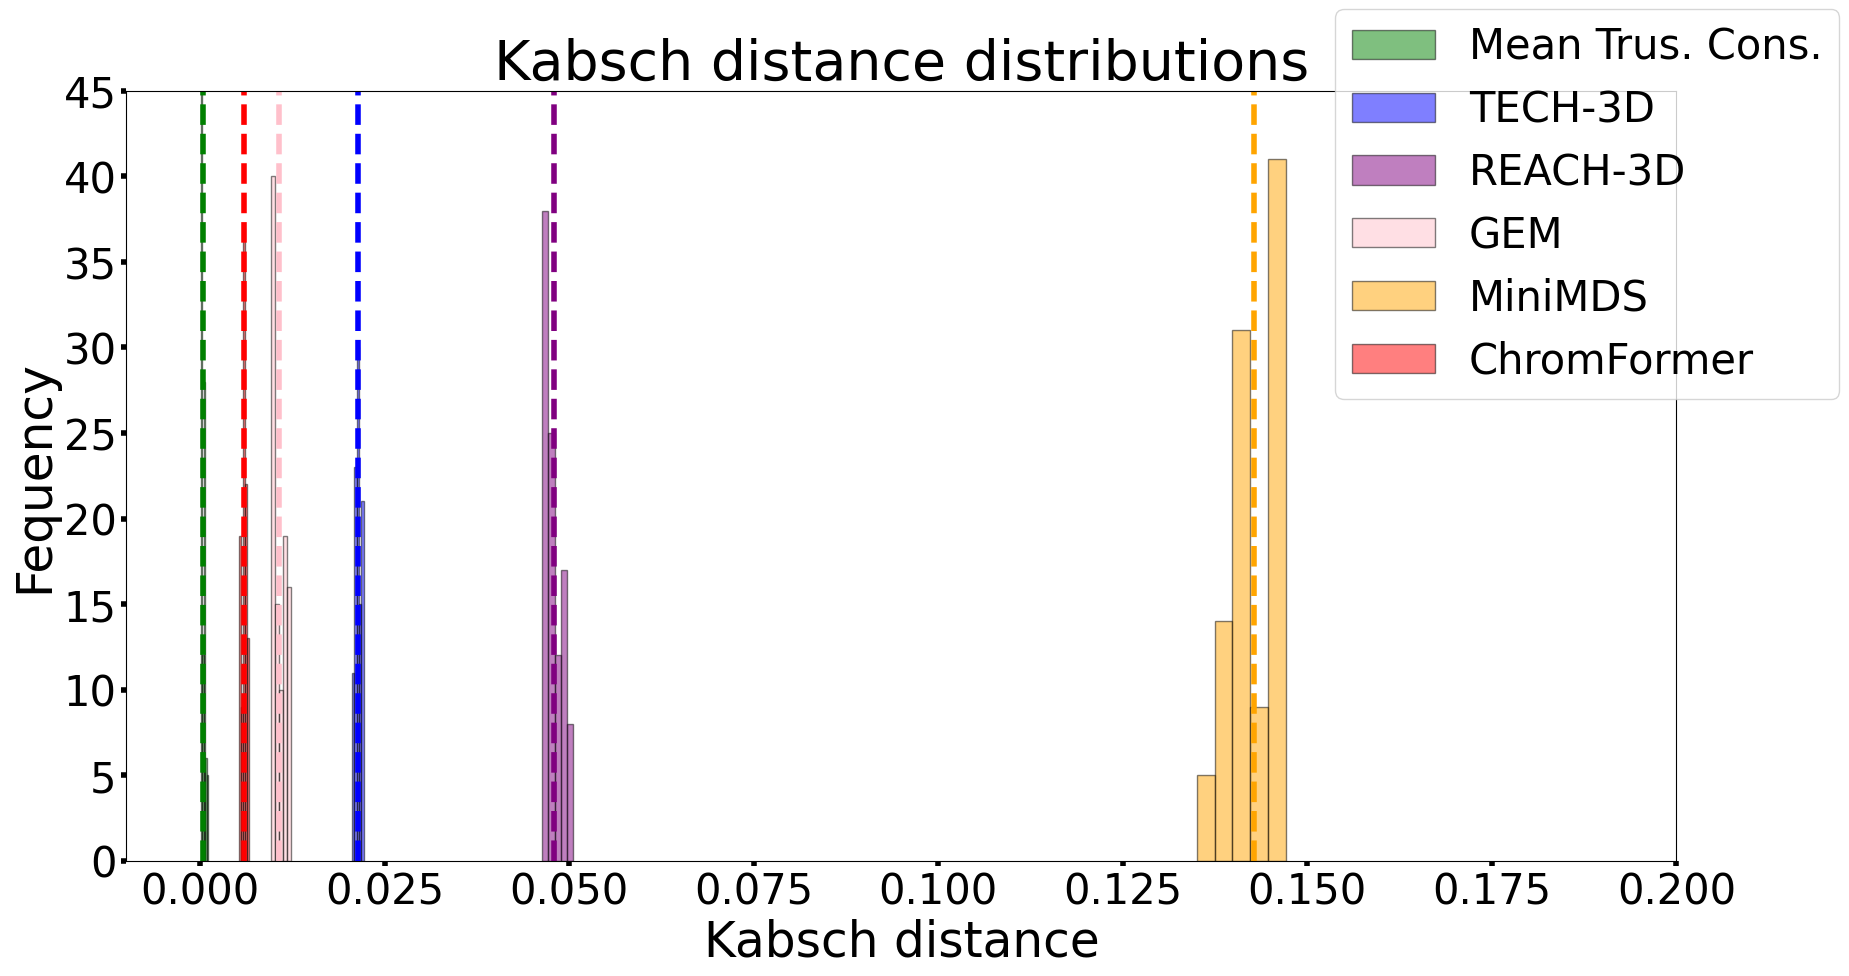

In [36]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

## Histograms
axs.hist(perfect_distribution, facecolor='green', label='Mean Trus. Cons.', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(perfect_mean, color='green', linestyle='dashed', linewidth=4)

axs.hist(tech3d_distribution, facecolor='blue', label='TECH-3D', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(tech_mean, color='blue', linestyle='dashed', linewidth=4)

axs.hist(reach3d_distribution, facecolor='purple', label='REACH-3D', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(reach3d_mean, color='purple', linestyle='dashed', linewidth=4)

axs.hist(gem_distribution, facecolor='pink', label='GEM', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(gem_mean, color='pink', linestyle='dashed', linewidth=4)

axs.hist(minimds_distribution, facecolor='orange', label='MiniMDS', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(minimds_mean, color='orange', linestyle='dashed', linewidth=4)

axs.hist(chrom_distribution, facecolor='red', label='ChromFormer', alpha=0.5, edgecolor='black', linewidth=1, bins=5)
axs.axvline(chrom_mean, color='red', linestyle='dashed', linewidth=4)

## Titles
axs.set_title('Kabsch distance distributions', fontsize=40)
axs.set_xlabel('Kabsch distance', fontsize=35)
axs.set_ylabel('Fequency', fontsize=35)
axs.legend(fontsize=35)

axs.tick_params(axis='both', which='major', labelsize=30, width=4)

## Axis limits
axs.set_xlim(-0.01, 0.2)
axs.set_ylim(0, 45)
plt.legend(fontsize=30, loc=(0.78, 0.6))

plt.savefig('distribution_of_the_kabsch_distances_between_the_trussart_100_structures_and_the_predicted_structure_of_various_methods.png')


plt.show()


In [75]:
chrom_distance = distance_matrix(chrom_display2,chrom_display2)
tech_distance = distance_matrix(tech_display1,tech_display1)
reach_distance = distance_matrix(reach_display3,reach_display3)
gem_distance = distance_matrix(gem_display1,gem_display1)
mds_distance = distance_matrix(mds_display5,mds_display5)
perfect_distance  = distance_matrix(perfect_structure,perfect_structure)

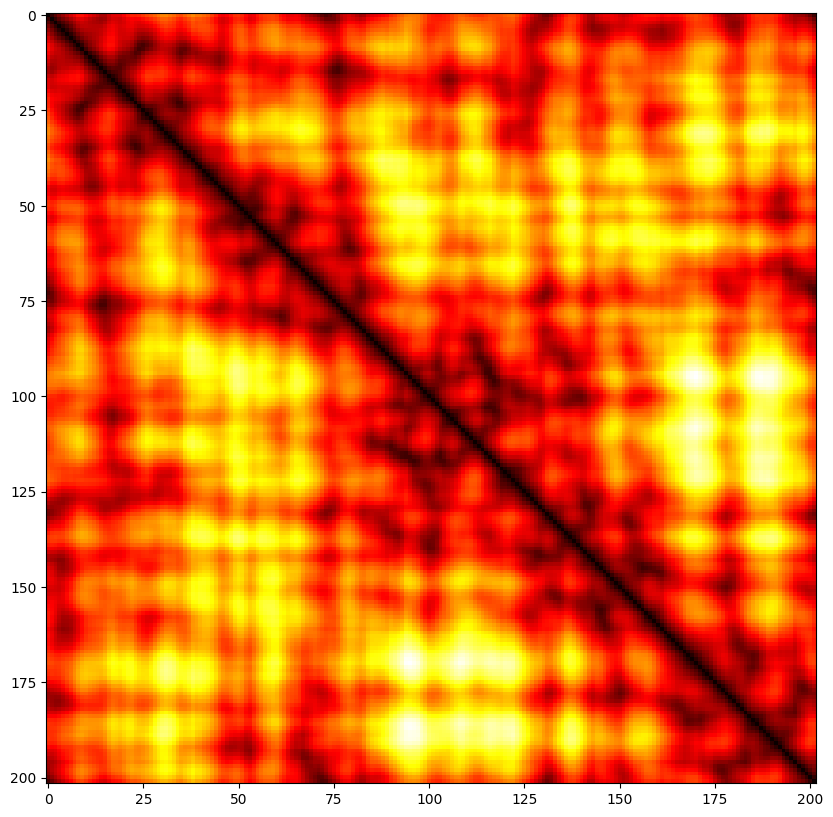

In [100]:
fig, axes = plt.subplots(figsize=(10,10))

axes.imshow(mds_distance, cmap='hot', interpolation='nearest')

plt.show()

In [82]:
print(mean_squared_error(chrom_distance,perfect_distance))
print(mean_squared_error(tech_distance,perfect_distance))
print(mean_squared_error(reach_distance,perfect_distance))
print(mean_squared_error(gem_distance,perfect_distance))
print(mean_squared_error(mds_distance,perfect_distance))

0.011183709021956763
0.04185580729015066
0.08833835765799267
0.0260147017487444
0.005028597216351464


In [94]:
print(np.var(np.diagonal(perfect_distance, offset=1)))
print(np.var(np.diagonal(chrom_distance, offset=1)))
print(np.var(np.diagonal(tech_distance, offset=1)))
print(np.var(np.diagonal(reach_distance, offset=1)))
print(np.var(np.diagonal(gem_distance, offset=1)))
print(np.var(np.diagonal(mds_distance, offset=1)))

6.933309500548874e-05
0.0007057496779762008
0.002751597178687178
0.004557377415914683
0.001587437646558131
0.0002914268075459234
